<a href="https://colab.research.google.com/github/Dmolight01/ProyectoModelosII/blob/main/EDA_y_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Análisis Exploratorio de los datos

Cargamos las librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

## 1) Importando los datos

Comenzamos instalando desde kaggle los datos de test.csv

In [ ]:
# Instala la biblioteca de Kaggle
!pip install kaggle

# Importa las bibliotecas necesarias
import os
import json

# Define las credenciales de Kaggle
kaggle_credentials = {
    "username": "ricardoosorioc",
    "key": "1f1a995f7c48191dc94721671d272f0c"
}

# Crea la carpeta .kaggle si no existe
kaggle_folder = '/content/.kaggle'
if not os.path.exists(kaggle_folder):
    os.makedirs(kaggle_folder)

# Guarda las credenciales en un archivo JSON
with open('/content/.kaggle/kaggle.json', 'w') as json_file:
    json.dump(kaggle_credentials, json_file)

# Configura las variables de entorno para usar Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content/.kaggle'

In [ ]:
!kaggle competitions download icr-identify-age-related-conditions -f train.csv

100% 329k/329k [00:00<00:00, 2.51MB/s]
100% 329k/329k [00:00<00:00, 2.50MB/s]


In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
df.head()

Id        AB          AF          AH         AM        AR  \
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688   
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   

         AX        AY         AZ          BC  ...        FL        FR  \
0  0.699861  0.025578   9.812214    5.555634  ...  7.298162   1.73855   
1  3.632190  0.025578  13.517790    1.229900  ...  0.173229   0.49706   
2  6.732840  0.025578  12.824570    1.229900  ...  7.709560   0.97556   
3  3.685344  0.025578  11.053708    1.229900  ...  6.122162   0.49706   
4  3.942255  0.054810   3.396778  102.151980  ...  8.153058  48.50134   

         FS         GB          GE            GF         GH         GI  \
0  0.094822  11.339138   72.611063   2003.810319  22.136229  69.834944   
1  0.568932   9.292698   72.611063  27981.562750  29.135430  32.131996   
2  1.198821  37.077772   88.609437  13676.957810  28.022851  35.192676   
3  0.284466  18.529584   82.416803   2094.262452  39.948656  90.493248   
4  0.121914  16.408728  146.109943   8524.370502  45.381316  36.262628   

          GL  Class  
0   0.120343      1  
1  21.978000      0  
2   0.196941      0  
3   0.155829      0  
4   0.096614      1  

[5 rows x 58 columns]

## 2) Limpieza de Datos

### 2.1) Tipos de datos

In [ ]:
df.dtypes

Id        object
AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ        object
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
dtype: object

In [ ]:
print(df['EJ'].nunique())

2


In [ ]:
print(df['EJ'])

0      B
1      A
2      B
3      B
4      B
      ..
612    A
613    B
614    A
615    B
616    A
Name: EJ, Length: 617, dtype: object


Codificamos la unica variable categorica que tenemos, que es 'EJ'

In [ ]:
# Codificar la columna 'EJ'
df['EJ_encoded'] = df['EJ'].apply(lambda x: 1 if x == 'B' else 0)

# Verificar los resultados
print(df[['EJ', 'EJ_encoded']].tail)

<bound method NDFrame.tail of     EJ  EJ_encoded
0    B           1
1    A           0
2    B           1
3    B           1
4    B           1
..  ..         ...
612  A           0
613  B           1
614  A           0
615  B           1
616  A           0

[617 rows x 2 columns]>


In [ ]:
print(df.shape)
print(type(df.shape))

(617, 59)
<class 'tuple'>


Split de los datos

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Class'])

### 2.2) Valores nulos

In [ ]:
for column in df_train.columns:
    num_nulls = df_train[column].isna().sum()
    print(f'Column "{column}" has {num_nulls} nulls')

Column "Id" has 0 nulls
Column "AB" has 0 nulls
Column "AF" has 0 nulls
Column "AH" has 0 nulls
Column "AM" has 0 nulls
Column "AR" has 0 nulls
Column "AX" has 0 nulls
Column "AY" has 0 nulls
Column "AZ" has 0 nulls
Column "BC" has 0 nulls
Column "BD " has 0 nulls
Column "BN" has 0 nulls
Column "BP" has 0 nulls
Column "BQ" has 51 nulls
Column "BR" has 0 nulls
Column "BZ" has 0 nulls
Column "CB" has 1 nulls
Column "CC" has 2 nulls
Column "CD " has 0 nulls
Column "CF" has 0 nulls
Column "CH" has 0 nulls
Column "CL" has 0 nulls
Column "CR" has 0 nulls
Column "CS" has 0 nulls
Column "CU" has 0 nulls
Column "CW " has 0 nulls
Column "DA" has 0 nulls
Column "DE" has 0 nulls
Column "DF" has 0 nulls
Column "DH" has 0 nulls
Column "DI" has 0 nulls
Column "DL" has 0 nulls
Column "DN" has 0 nulls
Column "DU" has 1 nulls
Column "DV" has 0 nulls
Column "DY" has 0 nulls
Column "EB" has 0 nulls
Column "EE" has 0 nulls
Column "EG" has 0 nulls
Column "EH" has 0 nulls
Column "EJ" has 0 nulls
Column "EL" 

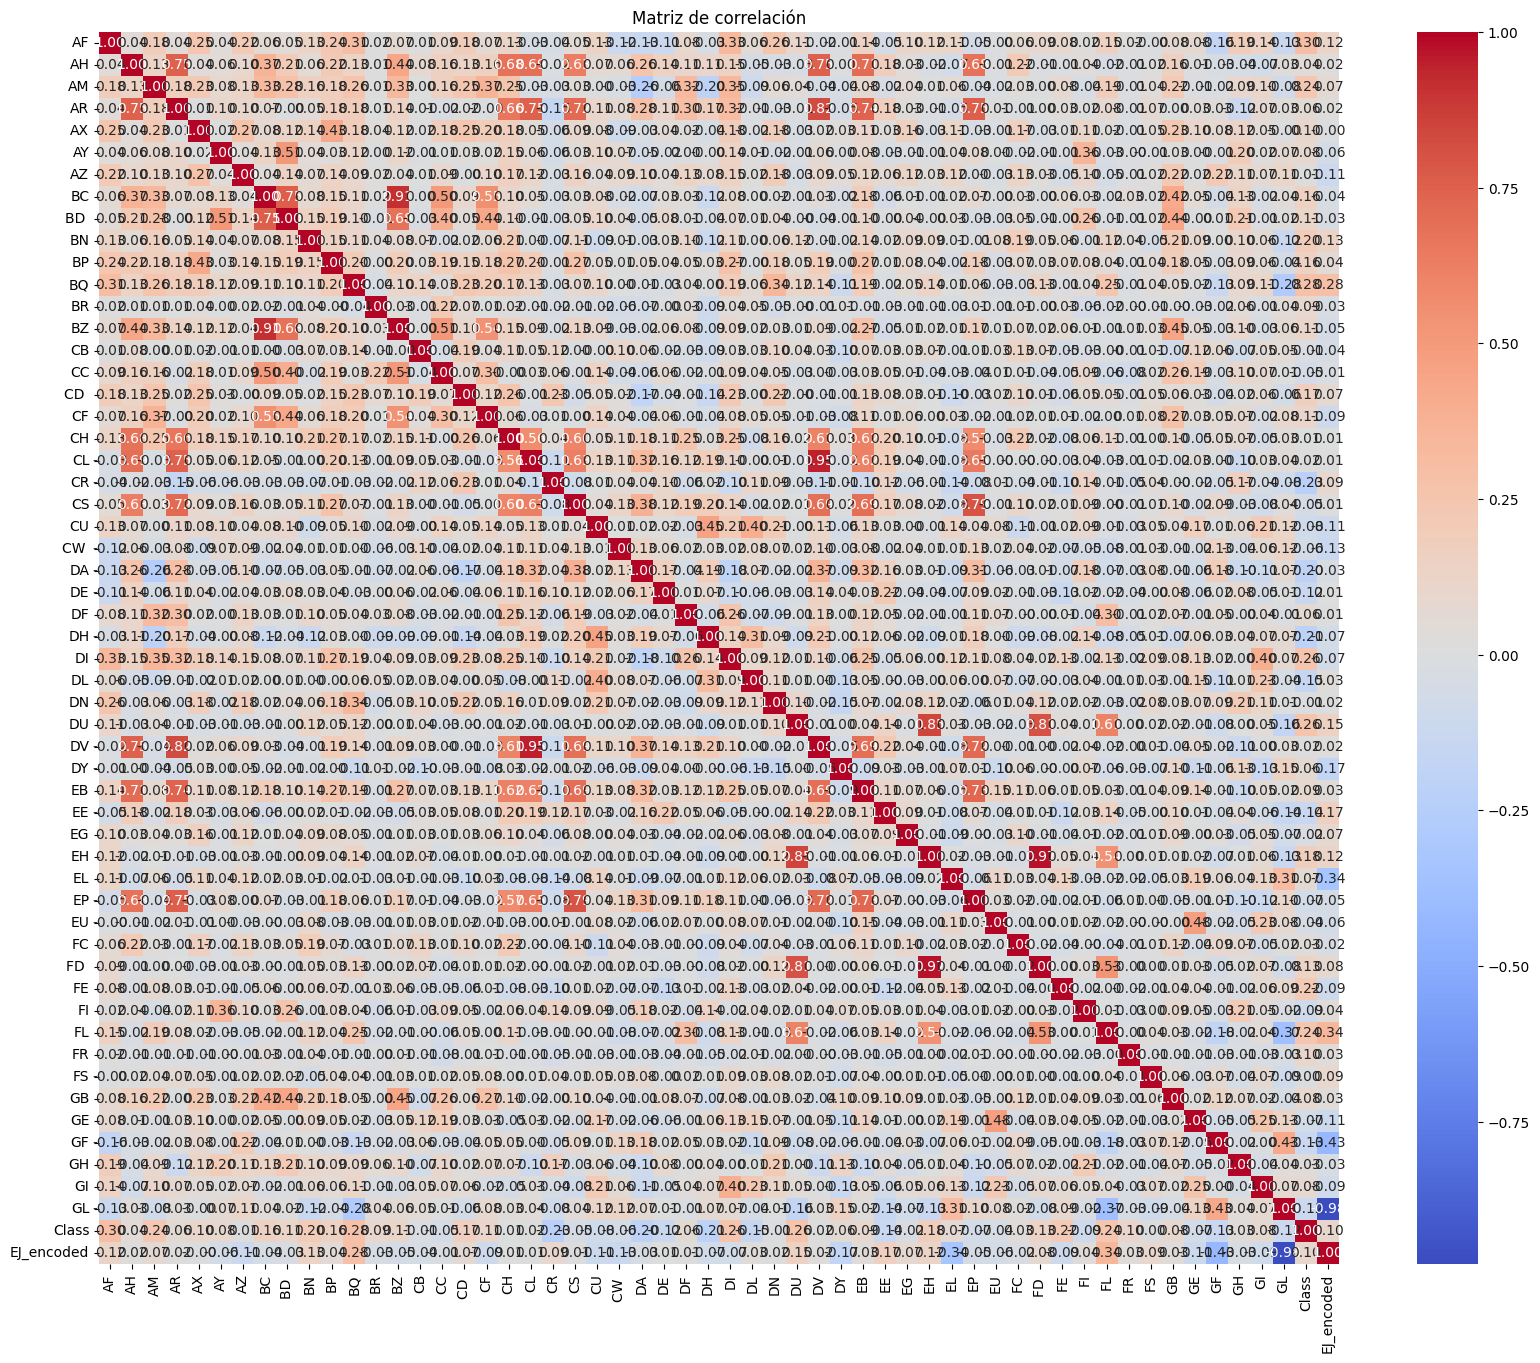

In [ ]:
df = df.iloc[:, 1:]
# Calcular la matriz de correlación
df=df.drop(['EJ'], axis=1)
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Revisamos las posibles correlaciones de las variables con nulos con otras variables

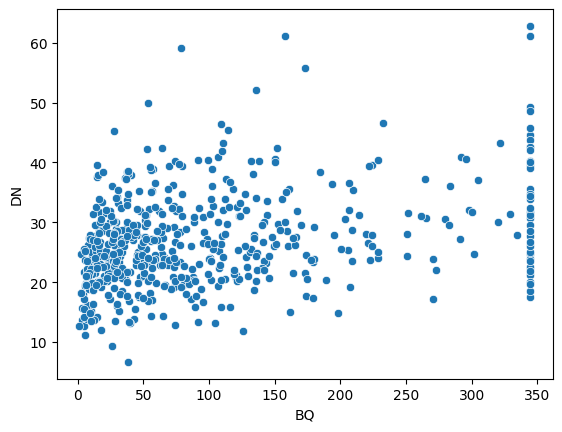

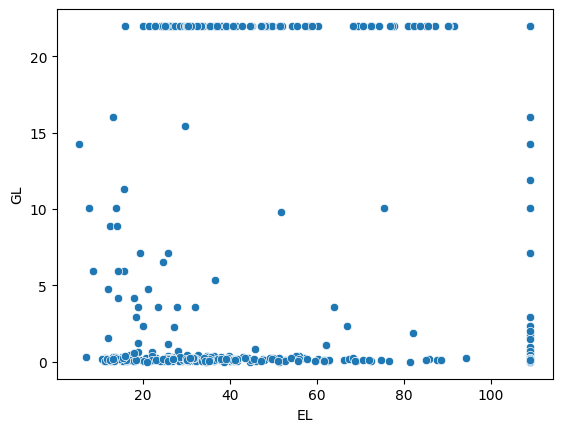

In [ ]:
# Scatter plot de 'BQ' con otra variable
sns.scatterplot(x='BQ', y='DN', data=df)
plt.show()

# Scatter plot de 'EL' con otra variable
sns.scatterplot(x='EL', y='GL', data=df)
plt.show()

In [ ]:
correlation = df['BQ'].corr(df['DN'])
print("Correlación entre BQ y DV:", correlation)

Correlación entre BQ y DV: 0.3441367147066123


In [ ]:
from scipy import stats

# Prueba t de Student para variables numéricas
group_nan = df[df['GL'].isna()]['Class']
group_no_nan = df[~df['GL'].isna()]['Class']

t_stat, p_value = stats.ttest_ind(group_nan, group_no_nan)
print("Valor p de la prueba t:", p_value)

Valor p de la prueba t: 0.6454377363871838


In [ ]:
from scipy import stats

# Prueba t de Student para variables numéricas
group_nan = df[df['BQ'].isna()]['Class']
group_no_nan = df[~df['BQ'].isna()]['Class']

t_stat, p_value = stats.ttest_ind(group_nan, group_no_nan)
print("Valor p de la prueba t:", p_value)

Valor p de la prueba t: 0.00016366506573964844


Debido a que no afectaban mucho a la variable objetivo, se eliminan las columnas

In [ ]:
df_train.drop(['BQ', 'EL'], axis=1)

Id        AB          AF          AH          AM        AR  \
166  41475fa34ab3  0.269199  2045.32350   93.473697   23.143881  8.138688   
132  34dc3190c6fb  0.491395  2073.95694   90.355875   12.403485  8.138688   
568  e9417cc82b93  0.602493  3719.52427  113.443434   28.071208  8.138688   
147  3a73fce81608  0.333294  4239.49152  129.137052  102.612901  8.138688   
481  c214d487e2db  0.235015  2648.34515   85.200147   10.474054  8.138688   
..            ...       ...         ...         ...         ...       ...   
261  67c8bfe99f1c  0.717864  7137.57341  115.376832   53.302467  8.138688   
163  407436e7ec52  0.217923  2808.64232   85.200147   14.339110  8.138688   
219  58843604dcb5  0.226469  3028.64452   92.672469   23.884064  8.138688   
369  8eefb589a7aa  0.405935   192.59328   85.200147   12.357030  8.138688   
491  c60e0e7b6ca1  0.290564  4875.39734   85.200147   20.762288  8.138688   

           AX        AY         AZ          BC  ...        FR        FS  \
166  9.009603  0.025578  10.971782    1.229900  ...   0.49706  0.067730   
132  6.183582  0.112056   4.701292    1.229900  ...   1.07706  0.555386   
568  7.211226  0.025578  11.148238    1.229900  ...   0.49706  0.067730   
147  3.596754  0.025578  10.335280    1.229900  ...   1.65010  0.257374   
481  2.919040  0.033495   3.396778    2.371950  ...   1.61066  0.413153   
..        ...       ...        ...         ...  ...       ...       ...   
261  4.540237  0.025578  11.211258  119.908222  ...  36.95789  0.128687   
163  4.854732  0.025578  13.593414   10.155460  ...   1.40012  0.135460   
219  2.462802  0.119364   3.396778    5.762960  ...   1.14028  0.108368   
369  6.387339  0.025578   6.402832    1.229900  ...   0.87696  1.219140   
491  4.686411  0.025578   9.005558   10.647420  ...   1.17798  0.067730   

            GB          GE            GF         GH         GI         GL  \
166  15.673870  229.023659   2850.852915  32.934571  28.299716   0.053460   
132  14.157644   72.611063   9797.235120  24.532553  13.724192  10.098000   
568   8.967128  125.065146   4911.188436  21.630173   8.299844   0.121224   
147  10.687998  138.843978   3272.364360  29.131709  49.042896   0.095264   
481  11.004266   72.611063  16045.774060  19.665485  20.851204   0.260780   
..         ...         ...           ...        ...        ...        ...   
261  19.943488  174.626095    142.913889  24.781860  47.522844   0.092272   
163  22.408518   72.611063   7478.350272  33.622956  34.559964  21.978000   
219  25.803748   72.611063  28135.094530  35.956023  12.646524  21.978000   
369   9.525248   73.207358   2322.462780  26.221887  95.251448   0.019800   
491  21.850398   72.611063   3580.530156  19.587344  39.259008   0.231000   

     Class  EJ_encoded  
166      0           1  
132      0           1  
568      0           1  
147      0           1  
481      0           1  
..     ...         ...  
261      1           1  
163      0           0  
219      0           0  
369      0           1  
491      0           1  

[493 rows x 57 columns]

In [ ]:
print(df_train.shape)

(493, 59)


In [ ]:
df_train = df_train.iloc[:, 1:]
# Calcular la matriz de correlación
df_train=df_train.drop(['EJ'], axis=1)
df_train = df_train.fillna(df_train.median())

In [ ]:
for column in df_train.columns:
    num_nulls = df_train[column].isna().sum()
    print(f'Column "{column}" has {num_nulls} nulls')

Column "AH" has 0 nulls
Column "AM" has 0 nulls
Column "AR" has 0 nulls
Column "AX" has 0 nulls
Column "AY" has 0 nulls
Column "AZ" has 0 nulls
Column "BC" has 0 nulls
Column "BD " has 0 nulls
Column "BN" has 0 nulls
Column "BP" has 0 nulls
Column "BQ" has 0 nulls
Column "BR" has 0 nulls
Column "BZ" has 0 nulls
Column "CB" has 0 nulls
Column "CC" has 0 nulls
Column "CD " has 0 nulls
Column "CF" has 0 nulls
Column "CH" has 0 nulls
Column "CL" has 0 nulls
Column "CR" has 0 nulls
Column "CS" has 0 nulls
Column "CU" has 0 nulls
Column "CW " has 0 nulls
Column "DA" has 0 nulls
Column "DE" has 0 nulls
Column "DF" has 0 nulls
Column "DH" has 0 nulls
Column "DI" has 0 nulls
Column "DL" has 0 nulls
Column "DN" has 0 nulls
Column "DU" has 0 nulls
Column "DV" has 0 nulls
Column "DY" has 0 nulls
Column "EB" has 0 nulls
Column "EE" has 0 nulls
Column "EG" has 0 nulls
Column "EH" has 0 nulls
Column "EL" has 0 nulls
Column "EP" has 0 nulls
Column "EU" has 0 nulls
Column "FC" has 0 nulls
Column "FD " 

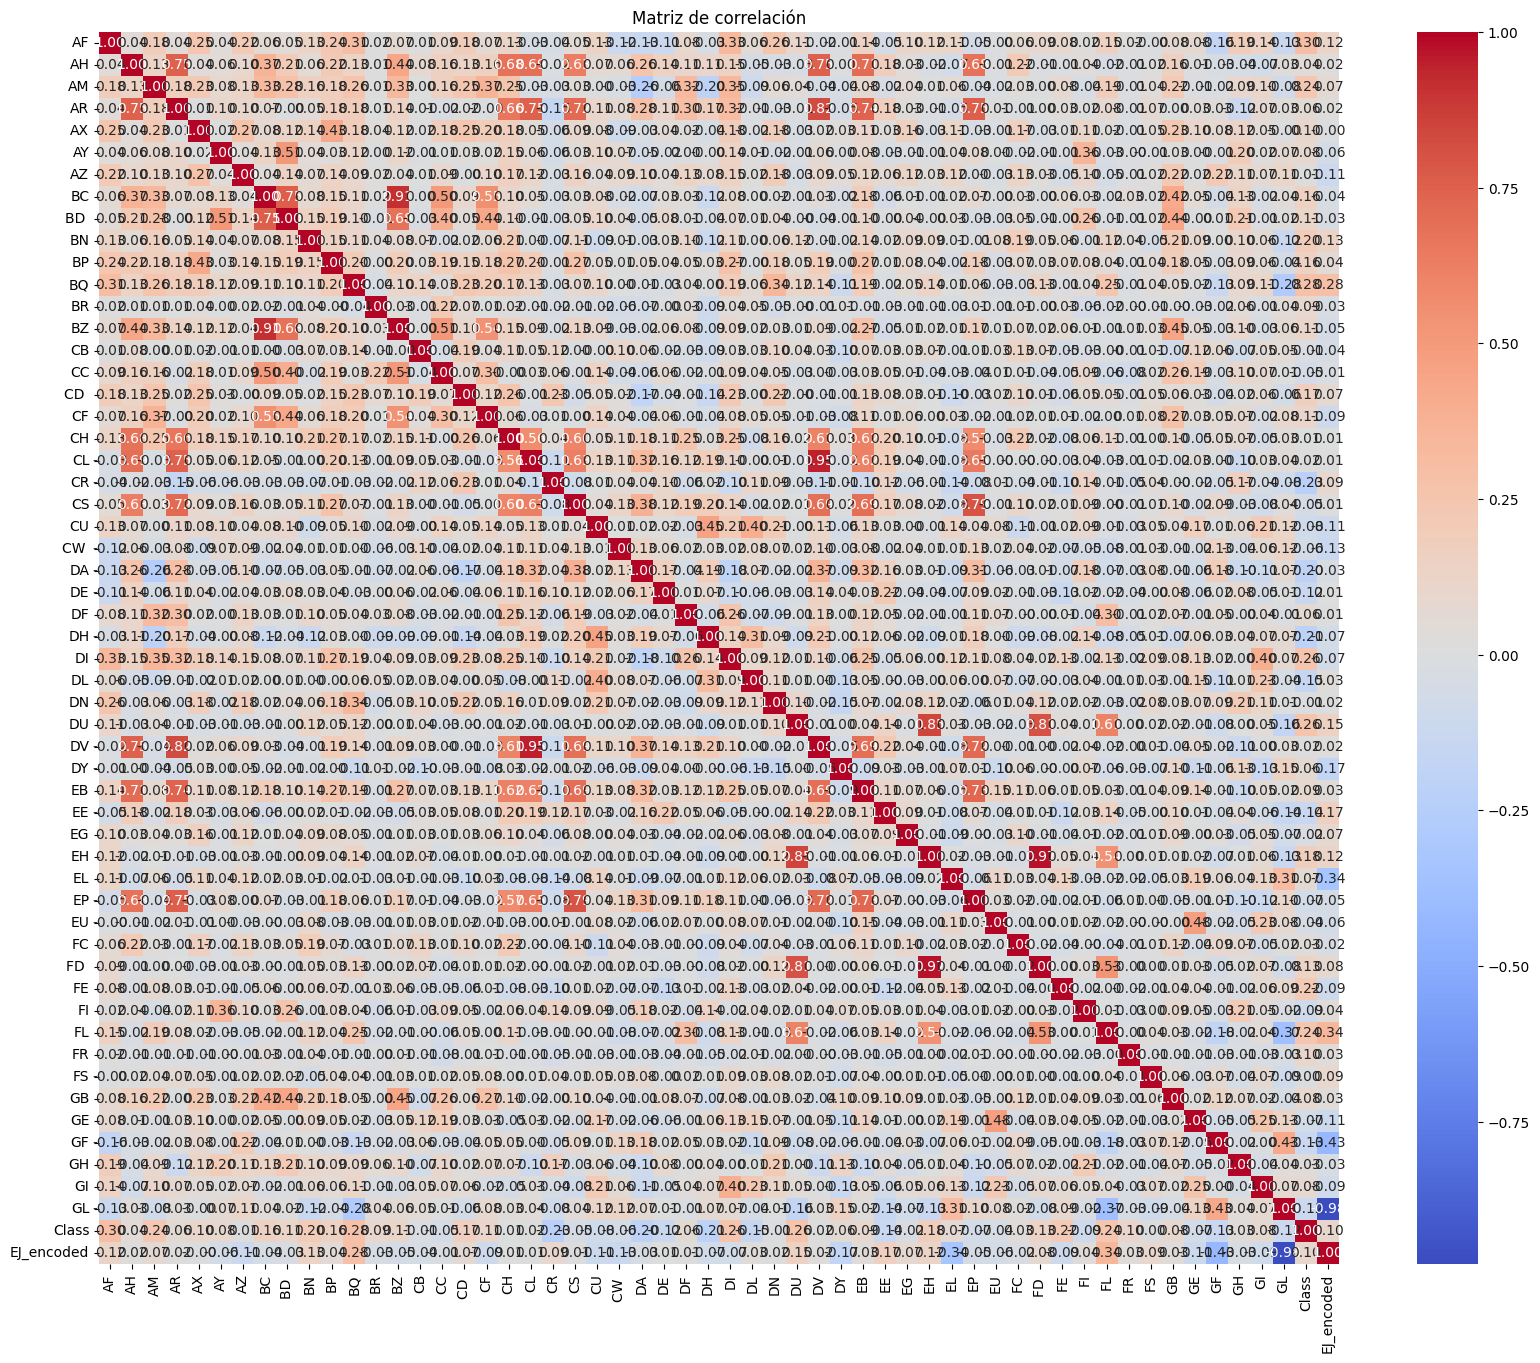

In [ ]:

correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

### 2.3) Valores duplicados

In [ ]:
df_train[df_train.duplicated(keep=False)]

Empty DataFrame
Columns: [AH, AM, AR, AX, AY, AZ, BC, BD , BN, BP, BQ, BR, BZ, CB, CC, CD , CF, CH, CL, CR, CS, CU, CW , DA, DE, DF, DH, DI, DL, DN, DU, DV, DY, EB, EE, EG, EH, EL, EP, EU, FC, FD , FE, FI, FL, FR, FS, GB, GE, GF, GH, GI, GL, Class, EJ_encoded]
Index: []

[0 rows x 55 columns]

## 3) Visualización

### 3.1) Análisis univariante

<Axes: ylabel='count'>

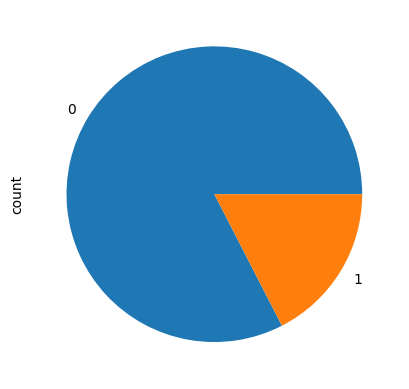

In [ ]:
plot_df = df_train.Class.value_counts()
plot_df.plot(kind="pie")

Importante: en el gráfico circular podemos ver que el conjunto de datos está muy desequilibrado ya que la fracción de muestras positivas (1) es muy pequeña en comparación con las muestras negativas (0).

Revisamos la correlacion de todas las variables con la variable objetivo con el fin de eliminar unas cuantas del conjunto de datos

In [ ]:
numeric_colunms=df_train.select_dtypes(include=['float64','int64'])

correlation_dict={}



for column in numeric_colunms.columns:
  correlation = df['Class'].corr(df[column])
  correlation_dict[column]=correlation

correlation_df=pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['Correlation_with_Class'])

correlation_df=correlation_df.sort_values(by='Correlation_with_Class', ascending=False)
print(correlation_df)


            Correlation_with_Class
Class                     1.000000
BQ                        0.281257
DU                        0.261000
DI                        0.260760
FL                        0.244185
AM                        0.239170
FE                        0.216359
BN                        0.198283
EH                        0.179855
CD                        0.171304
BP                        0.157286
BC                        0.155882
FD                        0.131100
BZ                        0.112423
BD                        0.112184
CF                        0.109748
FR                        0.104099
AX                        0.097616
EJ_encoded                0.096500
BR                        0.088554
EB                        0.088005
GB                        0.083343
AY                        0.082420
GI                        0.076894
EL                        0.067947
AR                        0.064380
DF                        0.064272
DY                  

Como el valor de correlación de las columnas CH, FS Y DN y la variable objetivo Class es muy crecana a 0, generalmente indica una correlación debil, es decir, menos importante es la relación entre esas dos variables en terminos de su asociación lineal. Pero en el caso de la variable CH en la matriz de calor de correlación observamos que tiene valores altos con otras variables, entonces la dejamos. Para las otras dos procedemos a eliminarlas.

In [ ]:

columns_to_drop = ['FS', 'DN']

# Imprimir las columnas antes de la eliminación
print("Columnas antes de la eliminación:")
print(df_train.columns)

# Eliminar las columnas del DataFrame
df_train.drop(columns=columns_to_drop, inplace=True)

# Imprimir las columnas después de la eliminación
print("Columnas después de la eliminación:")
print(df_train.columns)

Columnas antes de la eliminación:
Index(['AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP', 'BQ', 'BR',
       'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW ',
       'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE',
       'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR', 'FS',
       'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class', 'EJ_encoded'],
      dtype='object')
Columnas después de la eliminación:
Index(['AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP', 'BQ', 'BR',
       'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW ',
       'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DU', 'DV', 'DY', 'EB', 'EE', 'EG',
       'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR', 'GB', 'GE',
       'GF', 'GH', 'GI', 'GL', 'Class', 'EJ_encoded'],
      dtype='object')


<Axes: xlabel='AR', ylabel='Count'>

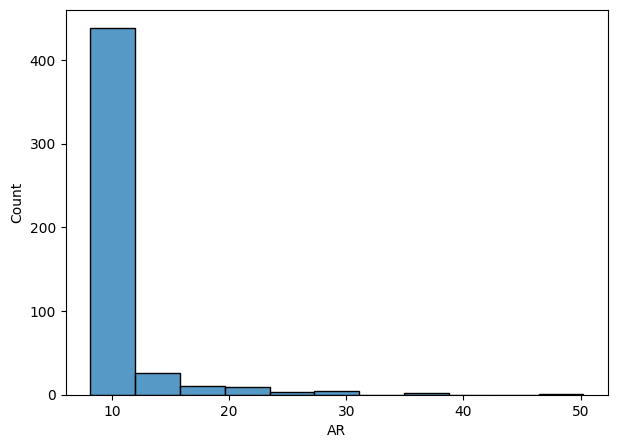

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='AR', bins=11)

<Axes: xlabel='AZ', ylabel='Count'>

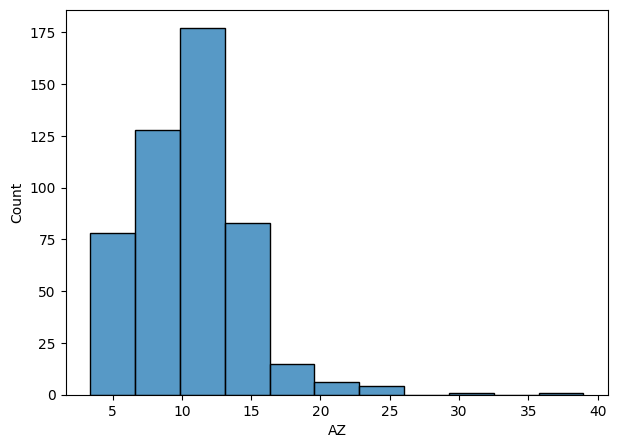

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='AZ', bins=11)

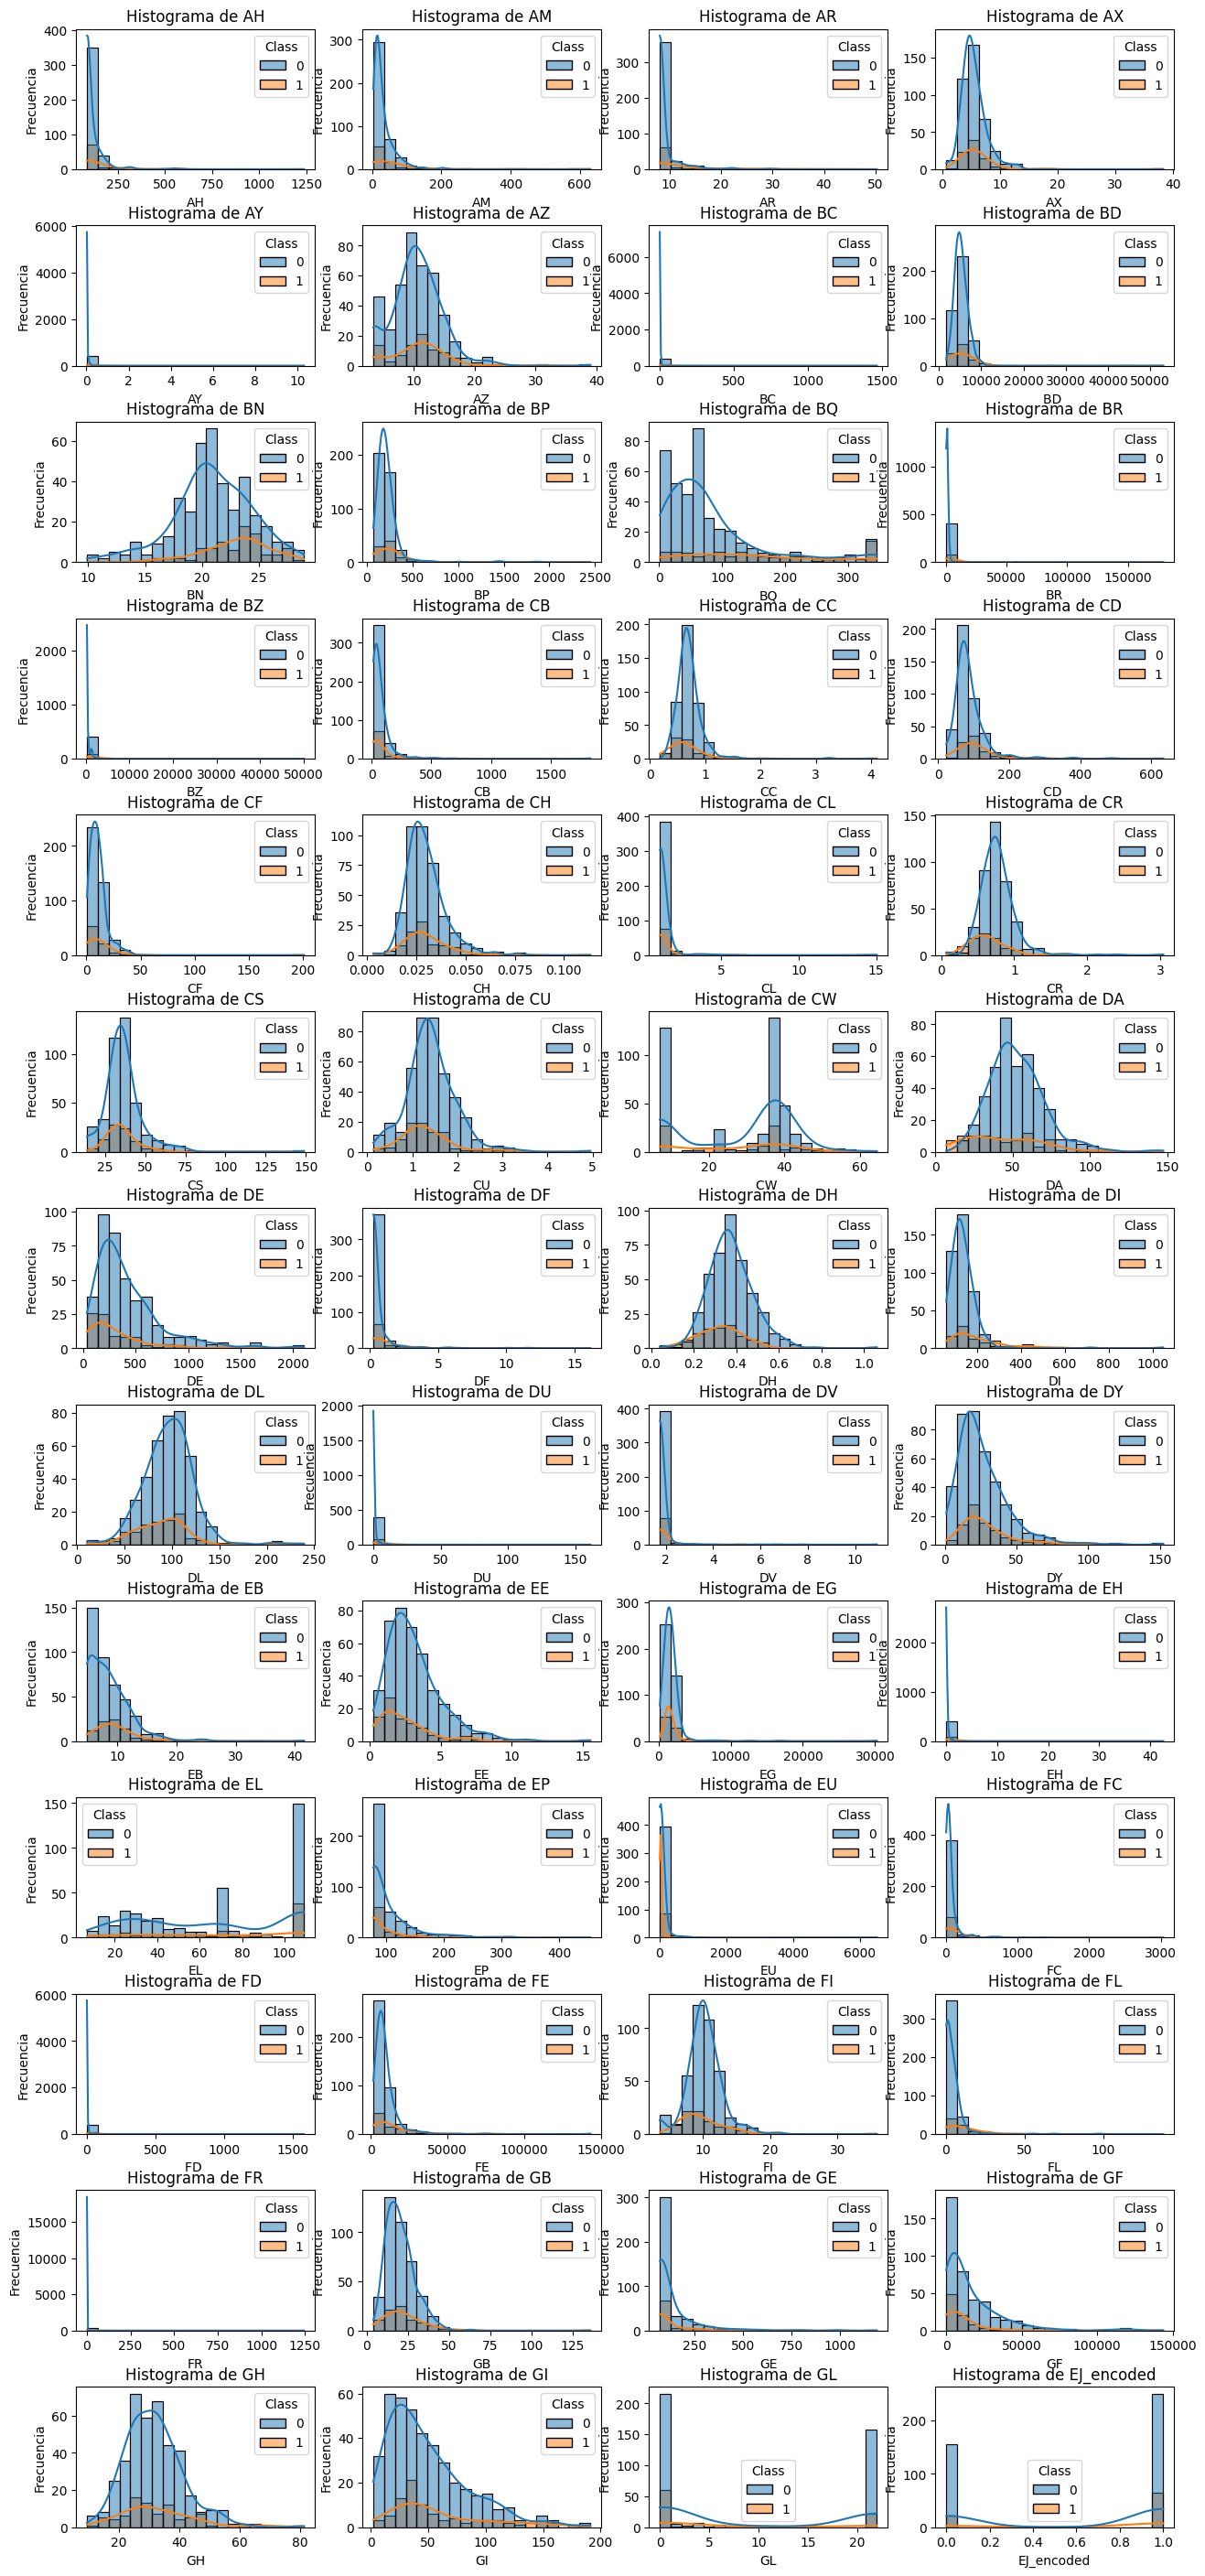

In [ ]:
fig, axs = plt.subplots(13,4, figsize=(15, 35))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, wspace=0.2, hspace=0.4)

vars = np.array(df_train.drop(columns=['Class']).columns).reshape((13,4)).tolist()
for row in vars:
  for column in row:
    sns.histplot(data=df_train, x=column, hue='Class', bins=20, kde=True,legend=True,ax=axs[vars.index(row), row.index(column)])
    axs[vars.index(row), row.index(column)].set_title('Histograma de '+column)
    axs[vars.index(row), row.index(column)].set_xlabel(column)
    axs[vars.index(row), row.index(column)].set_ylabel('Frecuencia')
plt.show()

### Análisis

En todos los graficos observamos que las distribuciones de las dos clases se superponen, lo cual indica que cada variable no es muy discriminativa entre las dos clases.

Para als variables AB, AF, AH , AM, AR, AM, AY, BC, BD, BP, BRBZ, CB, CD, CF, CH. CL. CS, DF, DI, DU, DV, EB, EG, EH, EP, EU, FC, FD, FE, FL, FR, GE estan sumamente sesgados hacia la izquierda, pero tienen valores atipicos que se alejan de esta moda. Estos valores pueden contener información util que ayude a distinguir entre clases, o pueden ser anomalias que dificulten la clasificación precisa. Hay que buscar una manera de tratarlos.

Para AZ, BQ, CA, DA, DE, DY, EE, FI, GB si bien tienen tendencia a un sesgo negativo, sus valores son mas variados, y su distribución es en caida, ademas no se notan muchos valores atipicos.

### 3.2) Valores Atípicos

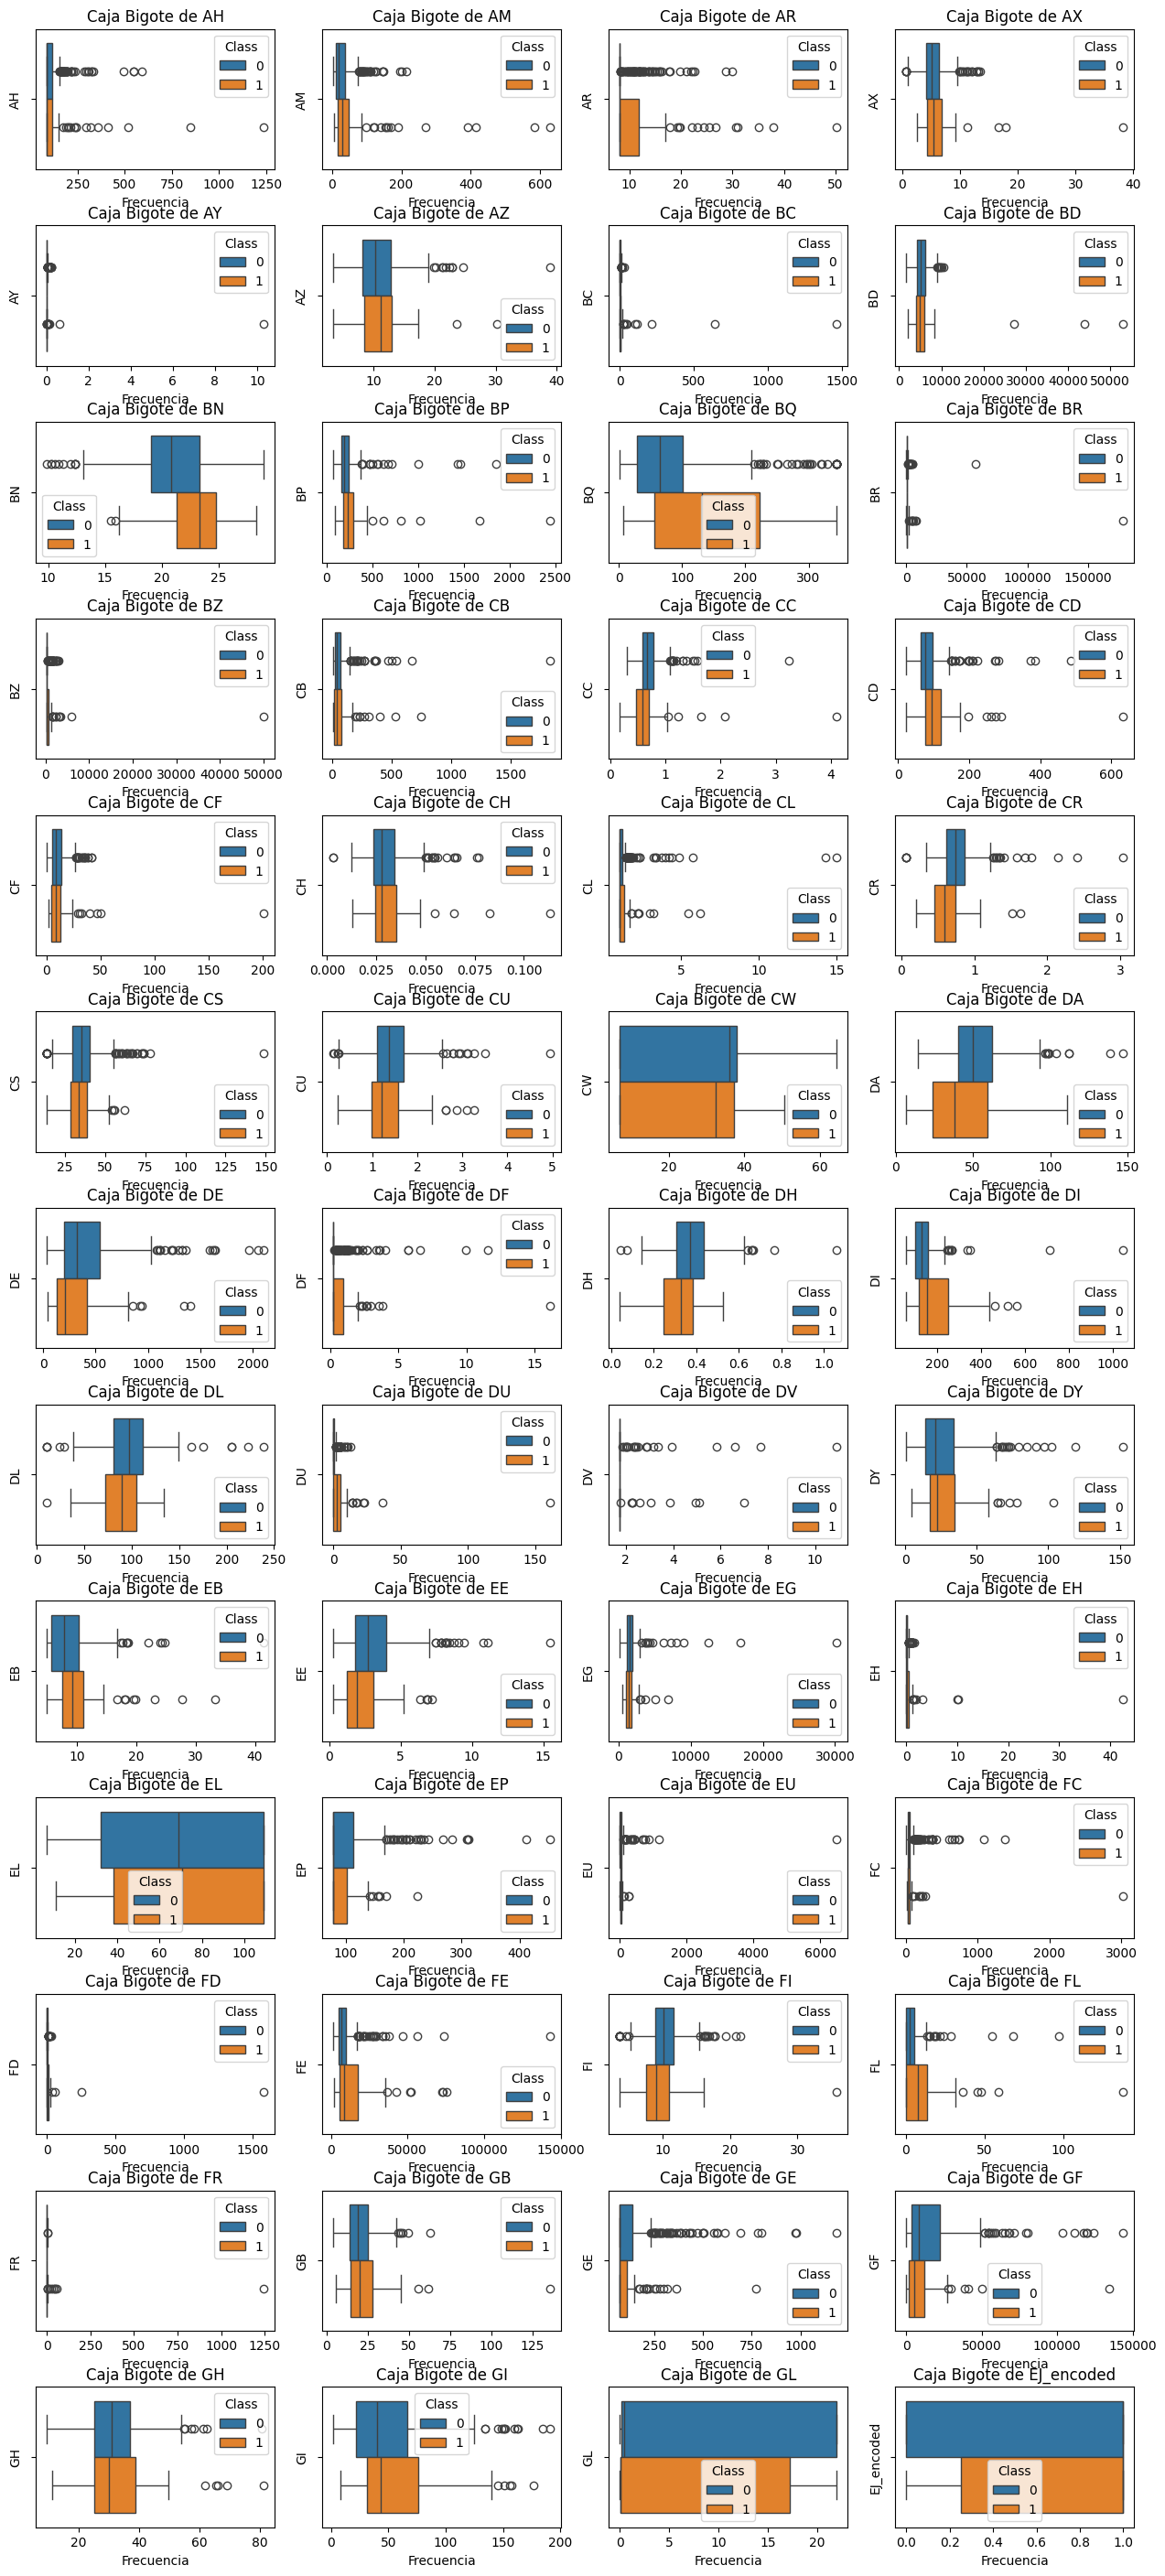

In [ ]:
fig, axs = plt.subplots(13,4, figsize=(15, 35))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, wspace=0.2, hspace=0.4)

vars = np.array(df_train.drop(columns=['Class']).columns).reshape((13,4)).tolist()
for row in vars:
  for column in row:
    sns.boxplot(data=df_train, x=column, hue='Class',legend=True,ax=axs[vars.index(row), row.index(column)])
    axs[vars.index(row), row.index(column)].set_title('Caja Bigote de '+column)
    axs[vars.index(row), row.index(column)].set_xlabel('Frecuencia')
    axs[vars.index(row), row.index(column)].set_ylabel(column)
plt.show()

Vislumbramos que hay varios valores atipicos en todas las columnas. Se buscar encontrar una solución a esta o borrarlos si no afectan al modelo.

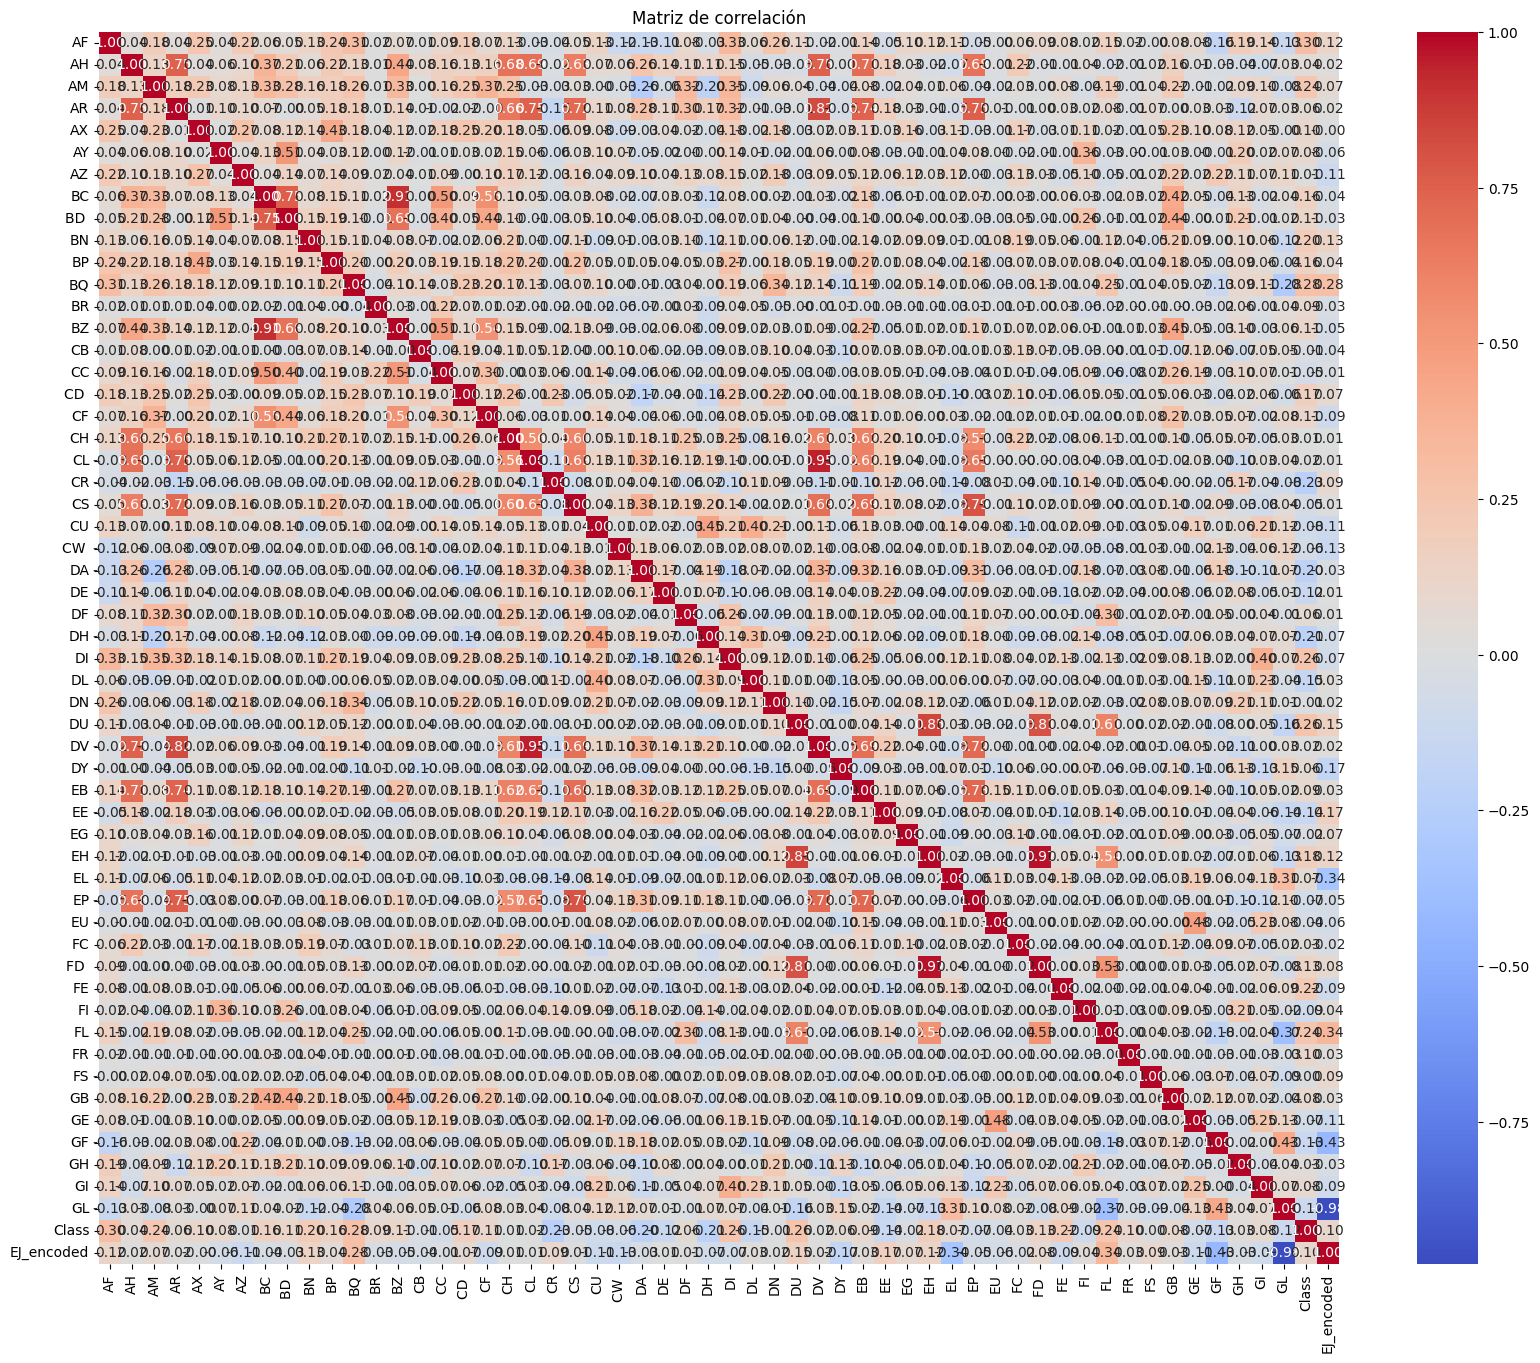

In [ ]:

correlation_matrix = df.corr()


plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

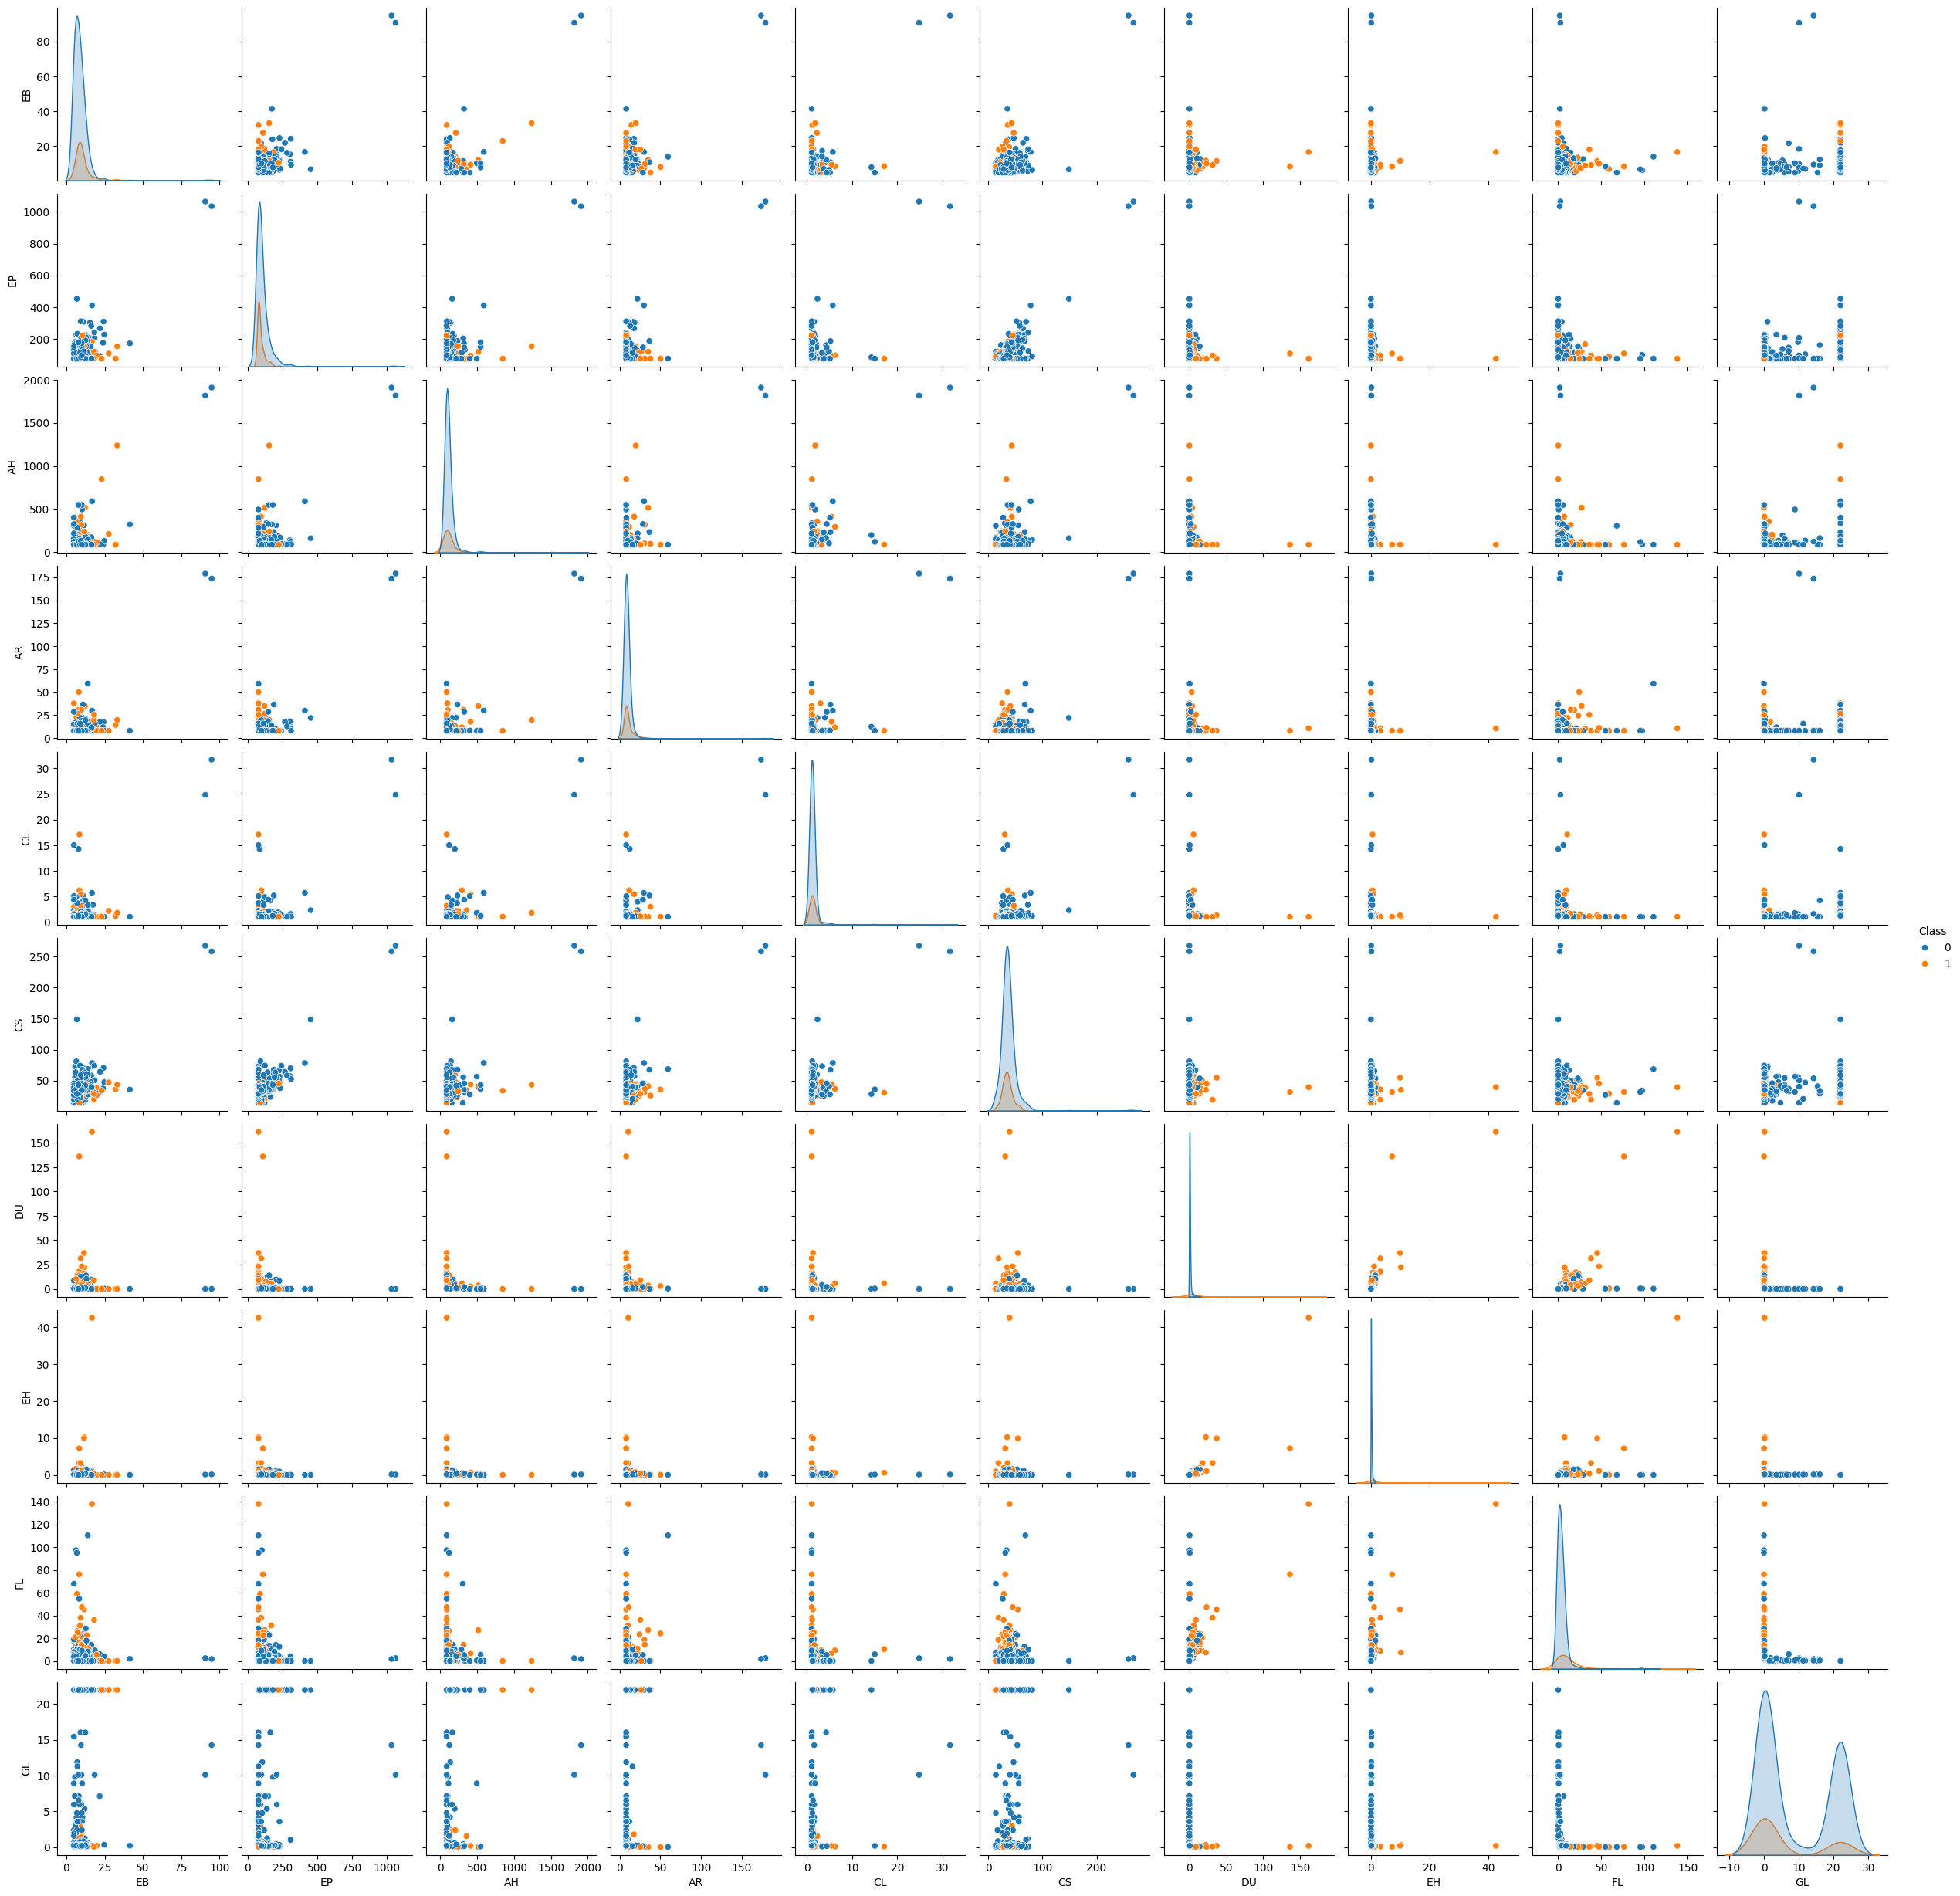

In [ ]:

variables_to_include = ['EB', 'EP', 'AH', 'AR', 'CL', 'CS', 'DU', 'EH', 'FL', 'GL']


sns.pairplot(df[variables_to_include + ['Class']], hue='Class')
plt.show()

#### Analisis

Podemos ver claramente en los graficos de GL x DU y Gl x EH hay una frontera entre los datos que indica si la clase es 0 o 1, que es nuestro problema en cuestión. Igualme DU x Fl, que se nota que mediante avanza hacia la izquierda, Class 1 predomina. Estas variables se posicionan con muy importantes a la hora de realizar el entrenamiento en el futuro, ya que se ve una clara distinción o frontera.